In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [3]:
# Load data from a CSV file
data = pd.read_csv('AustinPyData.csv')

# Display the first few rows
data.head()


,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfBathrooms,numOfBedrooms,numOfStories,homeImage,norm_livingAreaSqFt,norm_latestPrice,norm_numOfBedrooms,norm_numOfBathrooms,pricePerSqFt,propertyAge
0,111966154,Austin,111 raindance cv,78737,Are you looking for that unique Hill Country h...,30.162699,-97.996033,2.01,3,1,...,3.0,4,1,111966154_e3ec4447ebc20c5cff9a285662153329-p_f...,0.477542,0.005458,0.692123,0.368254,171.047893,14
1,29375805,Austin,9105 balcones club dr,78750,"Charming, one story in highly desirable neighb...",30.443525,-97.793488,1.98,3,1,...,2.0,3,1,29375805_11580a382eb9fb5103665d03dac246b0-p_f.jpg,-0.321941,0.175635,-0.506669,-0.652201,299.022427,53
2,125822584,Austin,1205 river ridge dr,78732,Award winning Silverton Custom Home 4BR(M down...,30.330589,-97.921974,1.98,2,0,...,4.0,4,2,125822584_71ddd689de6aa97fc7ba39617d74a4c3-p_f...,1.148398,0.856308,0.692123,1.388709,191.883224,7
3,29345202,Austin,10200 aqua verde ct,78733,Your own Resort style Living...Sparkling pool ...,30.336351,-97.875694,1.98,0,1,...,2.0,3,1,29345202_6e370bf99c2402fe6f10d77376cccec5-p_f.jpg,-0.127847,0.081092,-0.506669,-0.652201,248.618785,42
4,125230829,Austin,115 sand hills ln,78737,"115 Sand Hills Ln, Austin, TX 78737 is a singl...",30.180149,-97.982719,2.01,0,1,...,5.0,4,1,125230829_598cfbd4a352620806225099b5d43dc2-p_f...,0.921185,0.383630,0.692123,2.409164,171.488220,10


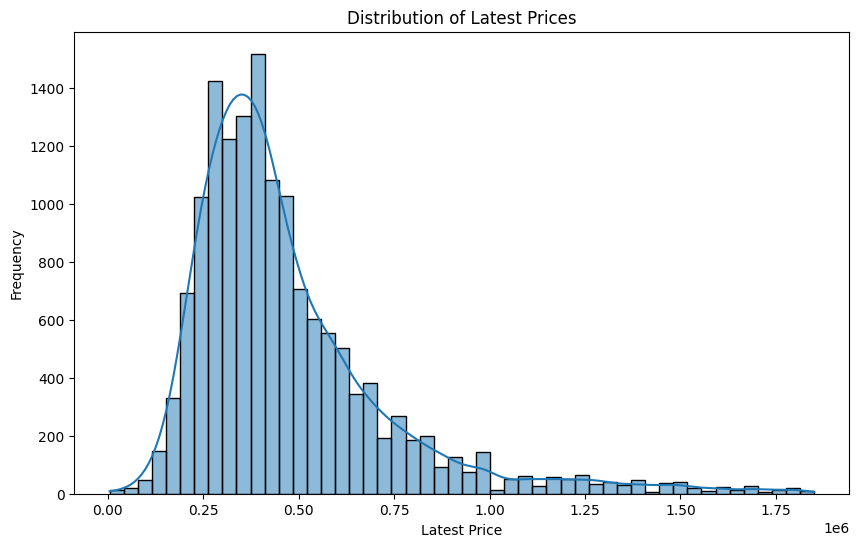

In [4]:
# looking at the data 
# Basic visualizations
plt.figure(figsize=(10, 6))
sns.histplot(data['latestPrice'], bins=50, kde=True)
plt.title('Distribution of Latest Prices')
plt.xlabel('Latest Price')
plt.ylabel('Frequency')
plt.show()


In [5]:
# Convert categorical variables to numeric
data['homeTypeEncoded'] = data['homeType'].map({
    'Single Family': 1, 
    'Condo': 2, 
    'Townhouse': 3, 
    'Multi Family': 4
}).fillna(0)



In [6]:
# Prediction of Market
# Prepare data for modeling
X = data[['norm_livingAreaSqFt', 'norm_numOfBedrooms', 'norm_numOfBathrooms', 'homeTypeEncoded']]
y = data['norm_latestPrice']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.6844531648172634


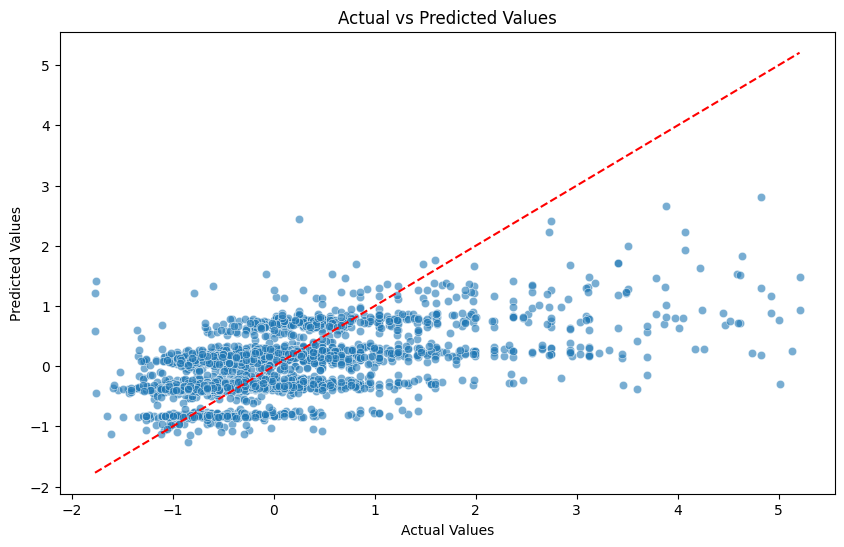

In [7]:
#Prediction of future values viz
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


In [8]:
from sklearn.metrics import r2_score

# Calculate R² Score
r2 = r2_score(y_test, predictions)
print(f'R² Score: {r2}')

from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
print(f'Cross-Validated MSE: {cv_mse}')

# Calculate baseline MSE (mean predictor)
baseline_predictions = [y_train.mean()] * len(y_test)
baseline_mse = mean_squared_error(y_test, baseline_predictions)
print(f'Baseline MSE (mean predictor): {baseline_mse}')


R² Score: 0.3079592671996768
Cross-Validated MSE: 0.9211392656708348
Baseline MSE (mean predictor): 0.9890755616182368


Best Parameters: {'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 13, 'n_estimators': 250}
Random Forest MSE: 0.586640819552515
Random Forest R² Score: 0.4068559201386792


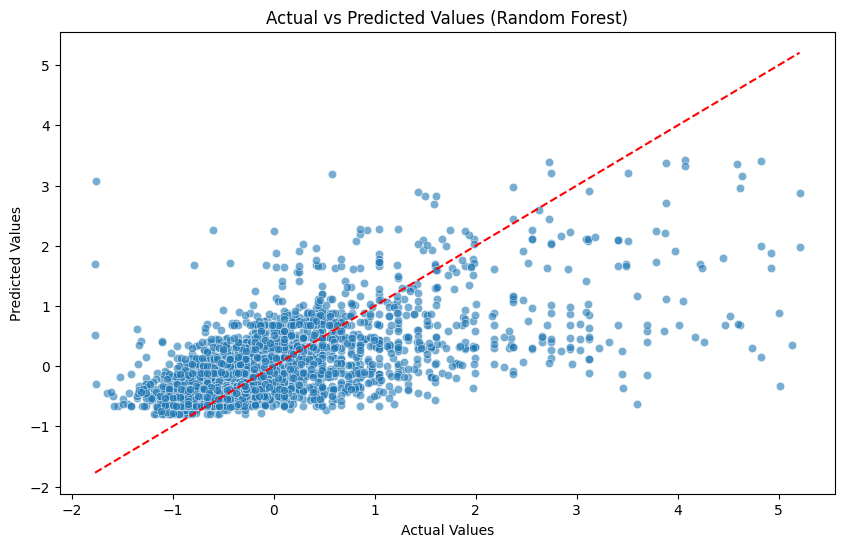

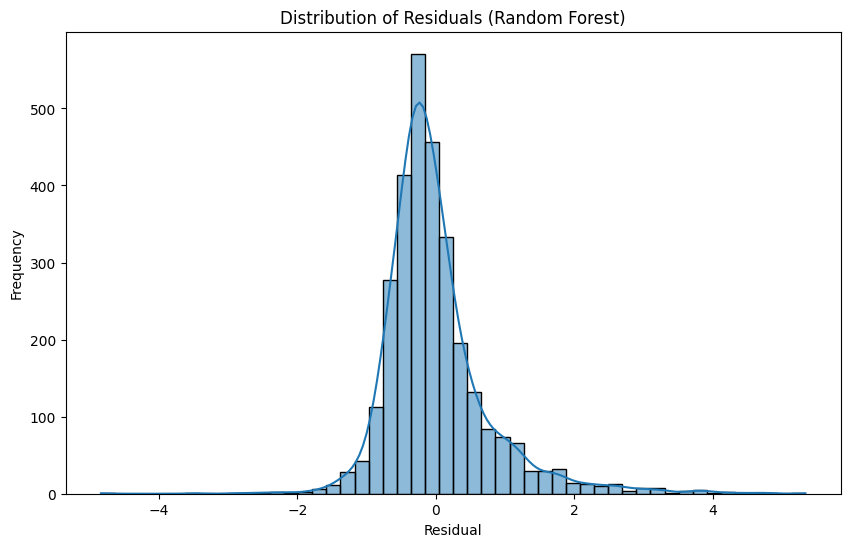

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define the model
rf_model = RandomForestRegressor(random_state=42)

# Define parameter grid with extended ranges
param_grid = {
    'n_estimators': [200, 250, 300, 350, 400],
    'max_depth': [6, 8, 10, 12, 14],
    'min_samples_split': [5, 7, 9, 11, 13],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

# Perform grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters from grid search
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Train model with best parameters
best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = best_rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print(f'Random Forest MSE: {rf_mse}')
print(f'Random Forest R² Score: {rf_r2}')

# Visualize the actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=rf_predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Random Forest)')
plt.show()

# Visualize the distribution of residuals
rf_residuals = y_test - rf_predictions
plt.figure(figsize=(10, 6))
sns.histplot(rf_residuals, bins=50, kde=True)
plt.title('Distribution of Residuals (Random Forest)')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()



Standard Deviation of Predictions: 0.6420897236344518
